In [178]:
%matplotlib inline

In [179]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics as st

In [180]:
# Read the csv files
city_file_to_load = pd.read_csv("Resources/city_data.csv")
ride_file_to_load = pd.read_csv("Resources/ride_data.csv")

In [181]:
# Create a pandas DataFrame for city data
city_data_df = pd.DataFrame(city_file_to_load)
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [182]:
# Check for any data anomaly
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [183]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [184]:
# Check the datatypes of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [185]:
city_data_df.describe()

,driver_count
count,120.000000
mean,24.775000
std,20.277678
min,1.000000
25%,7.000000
50%,20.500000
75%,38.250000
max,73.000000


In [186]:
# Create a pandas DataFrame for ride data
ride_data_df = pd.DataFrame(ride_file_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [187]:
# Check for data anomaly
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [188]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [189]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [190]:
ride_data_df.describe()

,fare,ride_id
count,2375.000000,2.375000e+03
mean,26.753112,4.887270e+12
std,12.109465,2.907361e+12
min,4.050000,3.218337e+08
25%,17.190000,2.381175e+12
50%,26.600000,4.748541e+12
75%,36.645000,7.461936e+12
max,58.550000,9.991538e+12


In [191]:
# Finally, we'll check to see how many data points there are for each type of city.
# Get unique values of the type of the city
city_types_list = city_data_df["type"].unique()
city_types_list

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [192]:
# Get the number of data points for the urban cities
sum(city_data_df['type']=='Urban')

66

In [193]:
# Get the number of data points for the suburban cities
sum(city_data_df['type']=='Suburban')

36

In [194]:
# Get the number of data points for the Rural cities
sum(city_data_df['type']=='Rural')


18

In [195]:
# All the data looks good with no null values
# Merge the two DataFrames
pyber_data_df = pd.merge(ride_data_df, city_data_df, on = "city", how = "left")
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [196]:
# Create three separate DataFrames, one for each type of city
# Create the urban city DataFrame
urban_city_df = pyber_data_df[(pyber_data_df["type"]=="Urban")]
urban_city_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [197]:
# Create the suburban city DataFrame
suburban_city_df = pyber_data_df[(pyber_data_df["type"]=="Suburban")]
suburban_city_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [198]:
# Create the rural city DataFrame
rural_city_df = pyber_data_df[(pyber_data_df["type"]=="Rural")]
rural_city_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [199]:
# Get the number of rides in each city for urban city type
urban_rides_count = urban_city_df.groupby(["city"]).count()["ride_id"]
urban_rides_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [200]:
# Get the number of rides in each city for suburban city type
suburban_rides_count = suburban_city_df.groupby(["city"]).count()["ride_id"]
suburban_rides_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [201]:
# Get the number of rides in each city for rural city type
rural_rides_count = rural_city_df.groupby(["city"]).count()["ride_id"]
rural_rides_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [202]:
# Get the average fare for urban city type
urban_cities_fares = urban_city_df.groupby(["city"]).mean()["fare"]
urban_cities_fares.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [203]:
# Get the average fare for suburban city type
suburban_cities_fares = suburban_city_df.groupby(["city"]).mean()["fare"]
suburban_cities_fares.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [204]:
# Get the average fare for rural city type
rural_cities_fares = rural_city_df.groupby(["city"]).mean()["fare"]
rural_cities_fares.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [205]:
# Get the average driver count in each city for each city type
# Get the urban driver count for each city
urban_driver_count = urban_city_df.groupby(["city"])["driver_count"].mean()
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [206]:
# Get the suburban driver count for each city
suburban_driver_count = suburban_city_df.groupby(["city"])["driver_count"].mean()
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [207]:
# Get the rural driver count for each city
rural_driver_count = rural_city_df.groupby(["city"])["driver_count"].mean()
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

## Create individual bubble plots for urban, suburban and rural cities

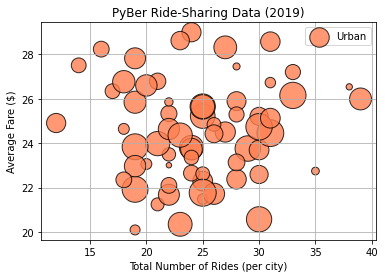

In [208]:
# Create a scatter plot for urban city type
plt.scatter(urban_rides_count, urban_cities_fares, s=urban_driver_count*10, color="coral", 
            alpha=0.8, linewidth=1, edgecolor="black", label="Urban")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.legend()
plt.grid()
plt.show()

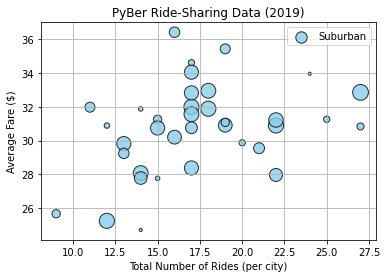

In [209]:
# Create a scatter plot for suburban city type
plt.scatter(suburban_rides_count, suburban_cities_fares, s=suburban_driver_count*10, color="skyblue", 
            alpha=0.8, linewidth=1, edgecolor="black", label="Suburban")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.legend()
plt.grid()
plt.show()

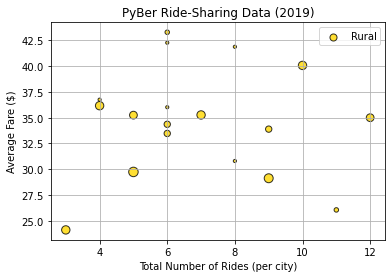

In [210]:
# create a scatter plot for rural city type
#plt.subplots(figsize=(10,10))
plt.scatter(rural_rides_count, rural_cities_fares, s=rural_driver_count*10, color="gold", 
            alpha=0.8, linewidth=1, edgecolor="black", label="Rural")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.legend()
plt.grid()
plt.show()

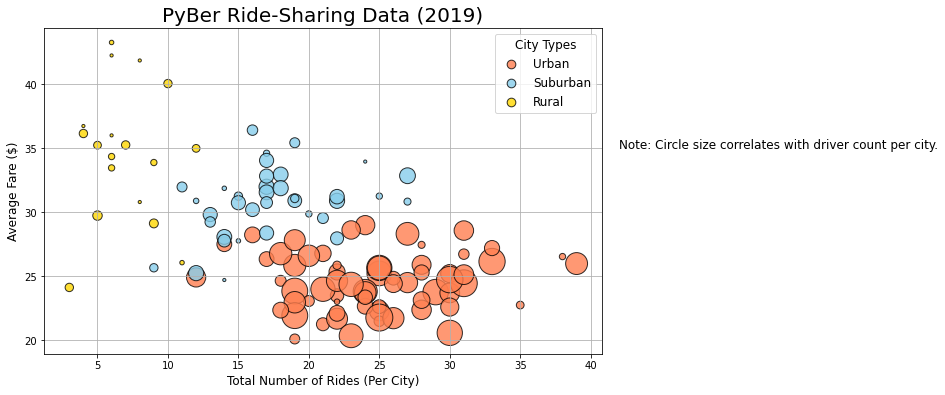

In [211]:
# We will combine our three scatter plot code blocks in one Jupyter Notebook cell.
# Add the scatter charts for each type of city.

# Increase the plot size.
plt.subplots(figsize=(10,6))


plt.scatter(urban_rides_count, urban_cities_fares, s=urban_driver_count*10, color="coral", 
            alpha=0.8, linewidth=1, edgecolor="black", label="Urban")

plt.scatter(suburban_rides_count, suburban_cities_fares, s=suburban_driver_count*10, color="skyblue", 
            alpha=0.8, linewidth=1, edgecolor="black", label="Suburban")

plt.scatter(rural_rides_count, rural_cities_fares, s=rural_driver_count*10, color="gold", 
            alpha=0.8, linewidth=1, edgecolor="black", label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create the legend
lgnd = plt.legend(fontsize=12, title="City Types", loc="best", mode="Expanded", scatterpoints=1)
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize=12)

# Save the plot
plt.savefig("Analysis/BubbleChart.png")


# Show the plot
plt.show()

## Summary Statistics for Number of Rides by City Type

In [212]:
# Pandas describe() function
pyber_data_df.describe()

,fare,ride_id,driver_count
count,2375.000000,2.375000e+03,2375.000000
mean,26.753112,4.887270e+12,28.930105
std,12.109465,2.907361e+12,20.666306
min,4.050000,3.218337e+08,1.000000
25%,17.190000,2.381175e+12,11.000000
50%,26.600000,4.748541e+12,23.000000
75%,36.645000,7.461936e+12,45.000000
max,58.550000,9.991538e+12,73.000000


In [213]:
# Get Summary Statistics.
# Let's use the describe() function on the urban, suburban, and rural DataFrames.
urban_city_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [214]:
suburban_city_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [215]:
rural_city_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [216]:
urban_rides_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [217]:
suburban_rides_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [218]:
rural_rides_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [219]:
# Pandas mean(), median(), and mode() Methods
# Calculate the mean of the ride count for each city type.
round(urban_rides_count.mean(),2), round(suburban_rides_count.mean(),2), round(rural_rides_count.mean(),2)

(24.62, 17.36, 6.94)

In [220]:
# Calculate the median of the ride count for each city type.
round(urban_rides_count.median(),2), round(suburban_rides_count.median(),2), round(rural_rides_count.median(),2)

(24.0, 17.0, 6.0)

In [221]:
# Calculate the mode of the ride count for the urban cities.
urban_rides_count.mode()

0    22
1    25
dtype: int64

In [222]:
# Calculate the mode of the ride count for the suburban cities.
suburban_rides_count.mode()

0    17
dtype: int64

In [223]:
# Calculate the mode of the ride count for the rural cities.
rural_rides_count.mode()

0    6
dtype: int64

In [224]:
# NumPy mean() and median() Functions and SciPy mode() Function
# import stats module from SciPy
import scipy.stats as sts

In [225]:
urban_rides_mean = round(np.mean(urban_rides_count),2)
urban_rides_median = round(np.median(urban_rides_count),2)

# Unlike the Pandas mode() method, the sts.mode() method 
# will return the number of times the mode appears in the dataset
urban_rides_mode = sts.mode(urban_rides_count)
print(f"The mode for the ride counts for urban trips is {urban_rides_mode}.")

print(urban_rides_mean, urban_rides_median)

The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).
24.62 24.0


In [226]:
suburban_rides_mean = round(np.mean(suburban_rides_count),2)
suburban_rides_median = round(np.median(suburban_rides_count),2)

suburban_rides_mode = sts.mode(suburban_rides_count)
print(f"The mode for the ride counts for suburban trips is {suburban_rides_mode}.")

print(suburban_rides_mean, suburban_rides_median)

The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).
17.36 17.0


In [227]:
rural_rides_mean = round(np.mean(rural_rides_count),2)
rural_rides_median = round(np.median(rural_rides_count),2)

rural_rides_mode = sts.mode(rural_rides_count)
print(f"The mode for the ride counts for urban trips is {rural_rides_mode}.")
print(rural_rides_mean, rural_rides_median)

The mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).
6.94 6.0


## Summary Statistics for the Fare by City Type

In [228]:
# Get the fares from urban city type
urban_fares = urban_city_df["fare"]
urban_fares

0       13.83
1       30.24
2       33.44
3       23.44
4       34.58
        ...  
1620    39.40
1621    32.05
1622    38.53
1623     7.63
1624    27.57
Name: fare, Length: 1625, dtype: float64

In [229]:
# Calculate mean(), median() and mode() for ride fares in each city type
urban_fare_mean = round(np.mean(urban_fares),2)
urban_fare_median = round(np.median(urban_fares),2)
urban_fare_mode = sts.mode(urban_fares)

print(f"The mean : ${urban_fare_mean}", 
      f"The median : ${urban_fare_median}, The mode : {urban_fare_mode}")

The mean : $24.53 The median : $24.64, The mode : ModeResult(mode=array([22.86]), count=array([5]))


In [230]:
# Get the fares from suburban city type
suburban_fares = suburban_city_df["fare"]
suburban_fares

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
        ...  
2245    13.92
2246    12.76
2247    27.70
2248    47.41
2249    17.97
Name: fare, Length: 625, dtype: float64

In [231]:
# Calculate mean(), median() and mode() for ride fares in each city type
suburban_fare_mean = round(np.mean(suburban_fares),2)
suburban_fare_median = round(np.median(suburban_fares),2)
suburban_fare_mode = sts.mode(suburban_fares)

print(f"The mean : ${suburban_fare_mean}", 
      f"The median : ${suburban_fare_median}, The mode : {suburban_fare_mode}")

The mean : $30.97 The median : $30.75, The mode : ModeResult(mode=array([17.99]), count=array([3]))


In [232]:
# Get the fares from rural city type
rural_fares = rural_city_df["fare"]
rural_fares

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
        ...  
2370    13.38
2371    20.76
2372    11.11
2373    44.94
2374    55.84
Name: fare, Length: 125, dtype: float64

In [233]:
# Calculate mean(), median() and mode() for ride fares in each city type
rural_fare_mean = round(np.mean(rural_fares),2)
rural_fare_median = round(np.median(rural_fares),2)
rural_fare_mode = sts.mode(rural_fares)

print(f"The mean : ${rural_fare_mean}", 
      f"The median : ${rural_fare_median}, The mode : {rural_fare_mode}")

The mean : $34.62 The median : $37.05, The mode : ModeResult(mode=array([37.05]), count=array([2]))


## Summary Statistics for the Number of Drivers by City Type

In [234]:
# Get the drivers count from urban city type
urban_drivers = urban_city_df["driver_count"]
urban_drivers

0        5
1       72
2       57
3       34
4       46
        ..
1620    67
1621    41
1622    11
1623     3
1624    57
Name: driver_count, Length: 1625, dtype: int64

In [235]:
# Calculate mean(), median() and mode() for drivers count in each city type
urban_fare_mean = round(np.mean(urban_drivers),2)
urban_fare_median = round(np.median(urban_drivers),2)
urban_fare_mode = sts.mode(urban_drivers)

print(f"The mean : ${urban_fare_mean}", 
      f"The median : ${urban_fare_median}, The mode : {urban_fare_mode}")

The mean : $36.68 The median : $37.0, The mode : ModeResult(mode=array([39], dtype=int64), count=array([86]))


In [236]:
# Get the drivers count from suburban city type
suburban_drivers = suburban_city_df["driver_count"]
suburban_drivers

1625    11
1626    20
1627    22
1628    19
1629    12
        ..
2245    12
2246     4
2247    23
2248     5
2249    17
Name: driver_count, Length: 625, dtype: int64

In [237]:
# Calculate mean(), median() and mode() for drivers count in each city type
suburban_fare_mean = round(np.mean(suburban_drivers),2)
suburban_fare_median = round(np.median(suburban_drivers),2)
suburban_fare_mode = sts.mode(suburban_drivers)

print(f"The mean : ${suburban_fare_mean}", 
      f"The median : ${suburban_fare_median}, The mode : {suburban_fare_mode}")

The mean : $13.71 The median : $16.0, The mode : ModeResult(mode=array([20], dtype=int64), count=array([79]))


In [238]:
# Get the drivers count from rural city type
rural_drivers = rural_city_df["driver_count"]
rural_drivers

2250    9
2251    8
2252    6
2253    2
2254    2
       ..
2370    6
2371    2
2372    1
2373    4
2374    1
Name: driver_count, Length: 125, dtype: int64

In [239]:
# Calculate mean(), median() and mode() for drivers count in each city type
rural_fare_mean = round(np.mean(rural_drivers),2)
rural_fare_median = round(np.median(rural_drivers),2)
rural_fare_mode = sts.mode(rural_drivers)

print(f"The mean : ${rural_fare_mean}", 
      f"The median : ${rural_fare_median}, The mode : {rural_fare_mode}")

The mean : $4.3 The median : $4.0, The mode : ModeResult(mode=array([1], dtype=int64), count=array([32]))


# Create a box-and-whisker plot
### Box-and-whisker plots are an effective way to show a lot of information about distribution in a small amount of space, especially outliers

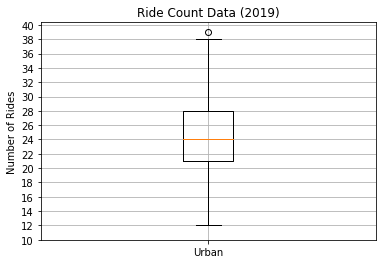

In [240]:
# Create our urban_ride_count box-and-whisker plot
fig, ax = plt.subplots()

x_labels = ["Urban"]
ax.boxplot(urban_rides_count, labels=x_labels)

# Add labels
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,41,2))
ax.grid()
plt.show()

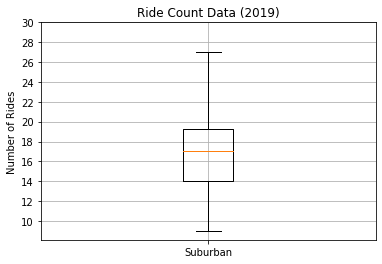

In [241]:
# Create our suburban_ride_count box-and-whisker plot
fig, ax = plt.subplots()

x_labels = ["Suburban"]
ax.boxplot(suburban_rides_count, labels=x_labels)

# Add labels
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,31,2))
plt.grid()
plt.show()


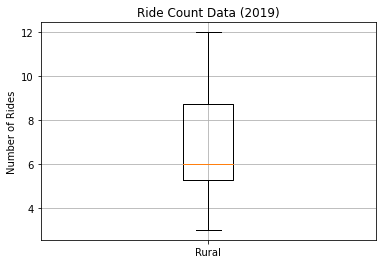

In [242]:
# Create our rural_ride_count box-and-whisker plot
fig, ax = plt.subplots()

x_labels = ["Rural"]
ax.boxplot(rural_rides_count, labels=x_labels)

# Add labels
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
#ax.set_yticks(np.arange(10,31,2))
plt.grid()
plt.show()


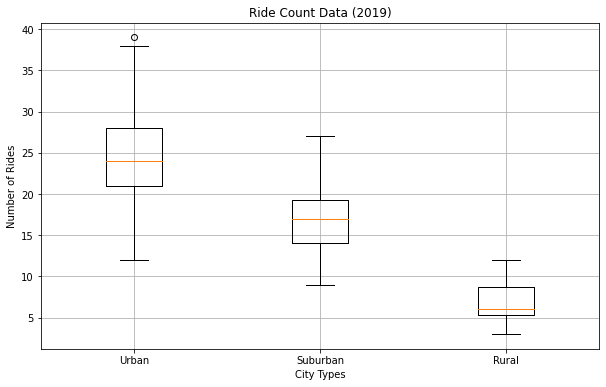

In [243]:
# Add all ride count box-and-whisker plots to the same graph.
fig, ax = plt.subplots(figsize=(10,6))

x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_rides_count, suburban_rides_count, rural_rides_count]

ax.boxplot(ride_count_data, labels=x_labels)

# Add labels
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_xlabel("City Types")
ax.grid()

# Save the figure.
plt.savefig("Analysis/Boxandwhiskers.png")

plt.show()

In [244]:
# One of our tasks was to find out if there were any outliers. 
# We know that the outlier for the urban_ride_count is 39. 
# From this information, we can find out which city has the highest rider count.

urban_rides_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [245]:
# Get the city that matches 39.
urban_city_outlier = urban_rides_count[urban_rides_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


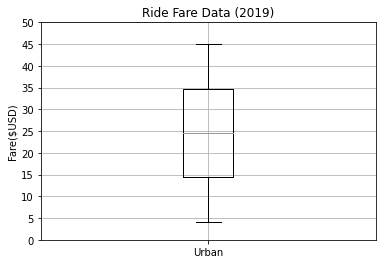

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [246]:
# Create our urban_fares_count box-and-whisker plot
fig, ax = plt.subplots()

x_labels = ["Urban"]
ax.boxplot(urban_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))

ax.grid()
plt.show()

print("Summary Statistics")
urban_fares.describe()

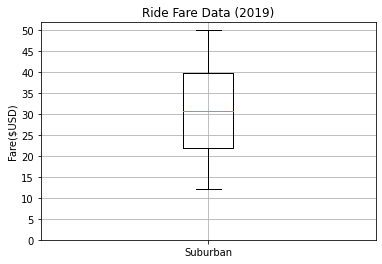

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [247]:
# Create our suburban_fares_count box-and-whisker plot
fig, ax = plt.subplots()

x_labels = ["Suburban"]
ax.boxplot(suburban_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))

ax.grid()
plt.show()

print("Summary Statistics")
suburban_fares.describe()

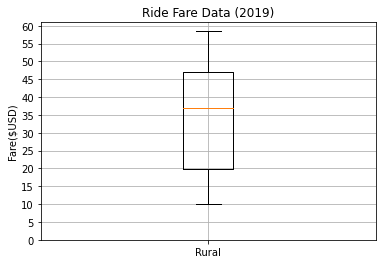

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [248]:
# Create our rural_fares_count box-and-whisker plot
fig, ax = plt.subplots()

x_labels = ["Rural"]
ax.boxplot(rural_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 61, step=5.0))

ax.grid()
plt.show()

print("Summary Statistics")
rural_fares.describe()

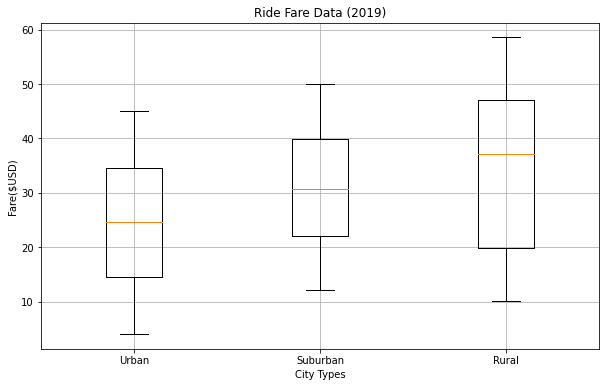

In [249]:
# Add all ride count box-and-whisker plots to the same graph.
fig, ax = plt.subplots(figsize=(10,6))

x_labels = ["Urban", "Suburban", "Rural"]
fares_count_data = [urban_fares, suburban_fares, rural_fares]

ax.boxplot(fares_count_data, labels=x_labels)

# Add labels
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_xlabel("City Types")
ax.grid()

# Save the figure.
plt.savefig("Analysis/Boxandwhiskers2.png")

plt.show()

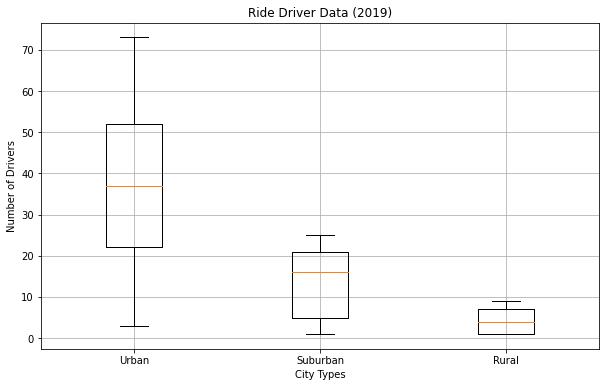

In [250]:
# Add all driver count box-and-whisker plots to the same graph.
fig, ax = plt.subplots(figsize=(10,6))

x_labels = ["Urban", "Suburban", "Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]

ax.boxplot(driver_count_data, labels=x_labels)

# Add labels
ax.set_title("Ride Driver Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_xlabel("City Types")
ax.grid()

# Save the figure.
plt.savefig("Analysis/Boxandwhiskers3.png")

plt.show()


## Get the Percentage of Fares for Each City Type

In [259]:
# Get the total fares for the urban city type
total_urban_fares = round(np.sum(urban_fares),2)

# Get the total fares for the suburban city type
total_suburban_fares = round(np.sum(suburban_fares),2)

# Get the total fares for the rural city type
total_rural_fares = round(np.sum(rural_fares),2)

print(f"Total Urban Fares : {total_urban_fares}, Total Suburban Fares : {total_suburban_fares} "
      f"Total Rural Fares : {total_rural_fares}")

Total Urban Fares : 39854.38, Total Suburban Fares : 19356.33 Total Rural Fares : 4327.93


[39854.38, 19356.33, 4327.93]


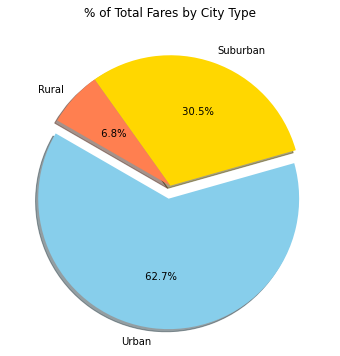

In [272]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

# Create a pie chart to show the percentage of fares for each city type
fig, ax = plt.subplots(figsize=(10,6))

fare_labels = ["Urban","Suburban","Rural"]
# Total fares
total_fares = [total_urban_fares, total_suburban_fares, total_rural_fares]
print(total_fares)
colors = ["skyblue","gold","coral"]
explode = [0.1,0,0]

plt.pie(total_fares, labels=fare_labels, shadow=True, explode=explode, startangle=150,
        colors=colors, autopct=" %1.1f%%")
plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("Analysis/Pieplot1.png")

plt.show()

In [296]:
# Get the total rides for the urban city type
total_urban_rides = urban_city_df["ride_id"].count()

# Get the total rides for the suburban city type
total_suburban_rides = suburban_city_df["ride_id"].count()

# Get the total rides for the rural city type
total_rural_rides = rural_city_df["ride_id"].count()

print(f"Total Urban Rides : {total_urban_rides}, Total Suburban Rides : {total_suburban_rides} "
      f"Total Rural Rides : {total_rural_rides}")

Total Urban Rides : 1625, Total Suburban Rides : 625 Total Rural Rides : 125


[1625, 625, 125]


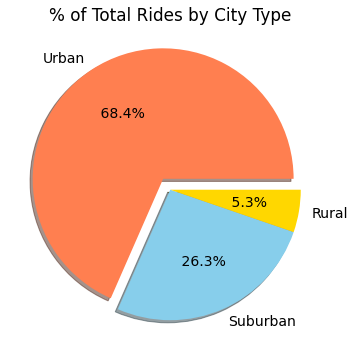

In [302]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

# Create a pie chart to show the percentage of rides for each city type
fig, ax = plt.subplots(figsize=(10,6))

type_labels = ["Urban","Suburban","Rural"]
# Total rides
total_rides = [total_urban_rides, total_suburban_rides, total_rural_rides]
print(total_rides)
colors = ["coral","skyblue","gold"]
explode = [0.1,0,0]

plt.pie(total_rides, labels=type_labels, shadow=True, explode=explode, startangle=0,
        colors=colors, autopct=" %1.1f%%")
plt.title("% of Total Rides by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("Analysis/Pieplot2.png")

plt.show()

In [305]:
# Get the total drivers for the urban city type
total_urban_drivers = np.sum(urban_drivers)

# Get the total drivers for the suburban city type
total_suburban_drivers = np.sum(suburban_drivers)

# Get the total drivers for the rural city type
total_rural_drivers = np.sum(rural_drivers)

print(f"Total Urban drivers : {total_urban_drivers}, Total Suburban drivers : {total_suburban_drivers} "
      f"Total Rural drivers : {total_rural_drivers}")

Total Urban drivers : 59602, Total Suburban drivers : 8570 Total Rural drivers : 537


[59602, 8570, 537]


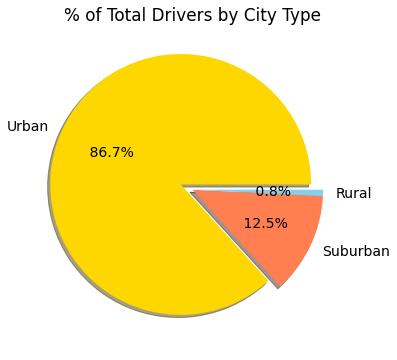

In [310]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

# Create a pie chart to show the percentage of drivers for each city type
fig, ax = plt.subplots(figsize=(10,6))

type_labels = ["Urban","Suburban","Rural"]
# Total drivers
total_drivers = [total_urban_drivers, total_suburban_drivers, total_rural_drivers]
print(total_drivers)
colors = ["gold","coral","skyblue"]
explode = [0.1,0,0]

plt.pie(total_drivers, labels=type_labels, shadow=True, explode=explode, startangle=0,
        colors=colors, autopct=" %1.1f%%")
plt.title("% of Total Drivers by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("Analysis/Pieplot3.png")

plt.show()